### ROSSMAN DATA ANALYSIS & VISUALIZATION

In [1]:
import os
import pandas as pd
import numpy as np
import calendar
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('E:\\Fall 2018\\Python\\Practice\\rossmann-store-sales')

In [3]:
%pwd

'E:\\Fall 2018\\Python\\Practice\\rossmann-store-sales'

In [4]:
data = pd.read_csv('train.csv', parse_dates = ['Date'])
data.head()

C:\Users\nsund\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
test = pd.read_csv('test.csv', parse_dates = ['Date'])
store = pd.read_csv('store.csv')
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null datetime64[ns]
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


### GETTING DATA WHERE STORE IS OPEN AND SALES GREATER THAN 0, TO MAKE IT MORE MEANINGFUL AND RESUCE 'MSE'

In [8]:
df = data[(data['Open'] != 0) & (data['Sales'] > 0)]
df.shape

(844338, 9)

In [9]:
df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
df.fillna(0, inplace = True)

C:\Users\nsund\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [11]:
df.loc[df.Open.isnull(), 'Open'] = 1

C:\Users\nsund\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### joining or merging 'store' data into 'df'

In [12]:
df = pd.merge(df, store, on = "Store")
df.shape

(844338, 18)

### CONVERTING THE DATA INTO NUMERICALS WHEN THEY ARE IN DIF CATEGORIES

In [13]:
mappings = {'0': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4}
df.StoreType.replace(mappings, inplace = True)

In [14]:
df.Assortment.replace(mappings, inplace = True)

In [15]:
df.StateHoliday.replace(mappings, inplace = True)

In [16]:
df.StateHoliday.unique()

array([0, 1, 2, 3], dtype=int64)

### ADDING EXTRA COLUMNS BY EXTRACTING YEAR, MONTH, DAY... FROM DATE

In [17]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['DayOfWeek'] = df.Date.dt.dayofweek
df['WeekOfYear'] = df.Date.dt.weekofyear

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [19]:
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,3,2015-07-30,5020,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31


### NO OF MONTHS COMPETITOR IS PRESENT

In [20]:
df['CompetitionOpen'] = (12 * (df.Year - df.CompetitionOpenSinceYear)) + (df.Month - df.CompetitionOpenSinceMonth)

### NO OF MONTHS PROMO IS OPEN WITH COMPITETOR 

In [21]:
df['PromoOpen'] = 12 *(df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) / 4.0
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen
0,1,4,2015-07-31,5263,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,NaN
1,1,3,2015-07-30,5020,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31,82.0,NaN
2,1,2,2015-07-29,4782,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31,82.0,NaN
3,1,1,2015-07-28,5011,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31,82.0,NaN
4,1,0,2015-07-27,6102,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31,82.0,NaN
5,1,5,2015-07-25,4364,500,1,0,0,0,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,25,30,82.0,NaN
6,1,4,2015-07-24,3706,459,1,0,0,0,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,24,30,82.0,NaN
7,1,3,2015-07-23,3769,503,1,0,0,0,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,23,30,82.0,NaN
8,1,2,2015-07-22,3464,463,1,0,0,0,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,22,30,82.0,NaN
9,1,1,2015-07-21,3558,469,1,0,0,0,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,21,30,82.0,NaN


In [22]:
df['PromoOpen'] = df.PromoOpen.apply(lambda x: x if x > 0 else 0)

In [23]:
df['Promo2SinceYear'] = df['Promo2SinceYear'].replace(np.nan, 0)

In [24]:
df['IsPromoMonth'] = 0

In [25]:
df.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### TO CHECK IF PROMOINTERVAL BELONGS TO COMPETITOR OR ROSSMAN 
SINCE INTERVAL IS PRESENT ONLY WHEN PROMO2 IS AVAILABLE IT BELONGS TO COMPETITOR

In [26]:
print(df[(df['Promo2'] > 0) & (df['PromoInterval'] == 0)])

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Year, Month, Day, WeekOfYear, CompetitionOpen, PromoOpen, IsPromoMonth]
Index: []


In [27]:
df['MonthStr'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['MonthStr']

0         Jul
1         Jul
2         Jul
3         Jul
4         Jul
5         Jul
6         Jul
7         Jul
8         Jul
9         Jul
10        Jul
11        Jul
12        Jul
13        Jul
14        Jul
15        Jul
16        Jul
17        Jul
18        Jul
19        Jul
20        Jul
21        Jul
22        Jul
23        Jul
24        Jul
25        Jul
26        Jul
27        Jun
28        Jun
29        Jun
30        Jun
31        Jun
32        Jun
33        Jun
34        Jun
35        Jun
36        Jun
37        Jun
38        Jun
39        Jun
40        Jun
41        Jun
42        Jun
43        Jun
44        Jun
45        Jun
46        Jun
47        Jun
48        Jun
49        Jun
50        Jun
51        Jun
52        May
53        May
54        May
55        May
56        May
57        May
58        May
59        May
60        May
61        May
62        May
63        May
64        May
65        May
66        May
67        May
68        May
69        May
70        May
71    

In [28]:
for x in df.PromoInterval.unique():
    if str(x) != 'nan':
        for y in x.split(','):
            df.loc[(df.MonthStr == y) & (df.PromoInterval == x), 'IsPromoMonth'] = 1

In [29]:
df['IsPromoMonth'].value_counts()

0    704189
1    140149
Name: IsPromoMonth, dtype: int64

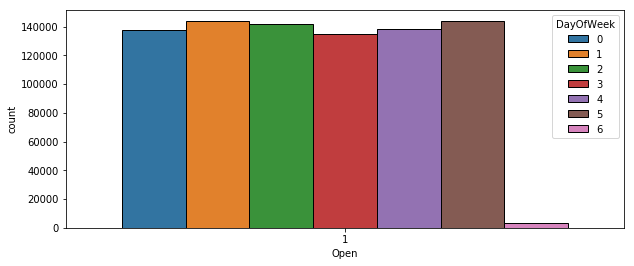

In [30]:
fig, (ax1) = plt.subplots(1,1,figsize=(10,4))
sn.countplot(x="Open", hue="DayOfWeek", edgecolor="black", data=df, ax=ax1)
plt.savefig("Sales_By_Day.png", bbox_inches="tight")

### MODEL BUILDING

In [31]:
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear                   0
PromoInterval                423292
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
CompetitionOpen              268600
PromoOpen                         0
IsPromoMonth                      0
MonthStr                          0
dtype: int64

In [32]:
df.drop(['Customers', 'PromoInterval', 'Date'], axis = 1, inplace=True)

In [33]:
df.fillna(0, inplace = True)

In [34]:
df['MonthStr'] = df['MonthStr'].astype('category')

In [35]:
df.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Open                            int64
Promo                           int64
StateHoliday                    int64
SchoolHoliday                   int64
StoreType                       int64
Assortment                      int64
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
Year                            int64
Month                           int64
Day                             int64
WeekOfYear                      int64
CompetitionOpen               float64
PromoOpen                     float64
IsPromoMonth                    int64
MonthStr                     category
dtype: object

In [36]:
# Get the columns that are category
cat_columns = df.select_dtypes(["category"]).columns

# Create mapping
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Convert columns to `int64` since some are `int8` (preserve numerical precision)
df[cat_columns] = df[cat_columns].astype("int64")

# Get the list of the features
features_list = df.drop("Sales", axis=1).columns.values

In [37]:
#defining variables:
df = df
X = df.loc[:, df.columns != 'Sales'].values
y = df.loc[:, df.columns == 'Sales'].values
X[0]

array([1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       3.000e+00, 1.000e+00, 1.270e+03, 9.000e+00, 2.008e+03, 0.000e+00,
       0.000e+00, 0.000e+00, 2.015e+03, 7.000e+00, 3.100e+01, 3.100e+01,
       8.200e+01, 0.000e+00, 0.000e+00, 5.000e+00])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
X_train[1]

array([2.900e+01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       4.000e+00, 3.000e+00, 2.170e+03, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 2.014e+03, 9.000e+00, 2.300e+01, 3.900e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01])

In [41]:
y_train[1]

array([5312], dtype=int64)

In [42]:
X_test[1]

array([1.073e+03, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 3.000e+00, 1.710e+03, 0.000e+00, 0.000e+00, 1.000e+00,
       4.400e+01, 2.012e+03, 2.013e+03, 1.000e+01, 1.800e+01, 4.200e+01,
       0.000e+00, 1.150e+01, 1.000e+00, 1.000e+01])

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_jobs=-1, random_state=8)
rf_reg.fit(X, y)

features = rf_reg.feature_importances_

feature_importance = pd.DataFrame(list(reversed(sorted(zip(features, features_list)))))

C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nsund\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
feature_importance

,0,1
0,0.195740,CompetitionDistance
1,0.168434,Store
2,0.135632,Promo
3,0.072099,DayOfWeek
4,0.062741,CompetitionOpenSinceYear
5,0.059878,CompetitionOpenSinceMonth
6,0.051548,CompetitionOpen
7,0.042127,Day
8,0.035591,StoreType
9,0.032855,WeekOfYear


[]

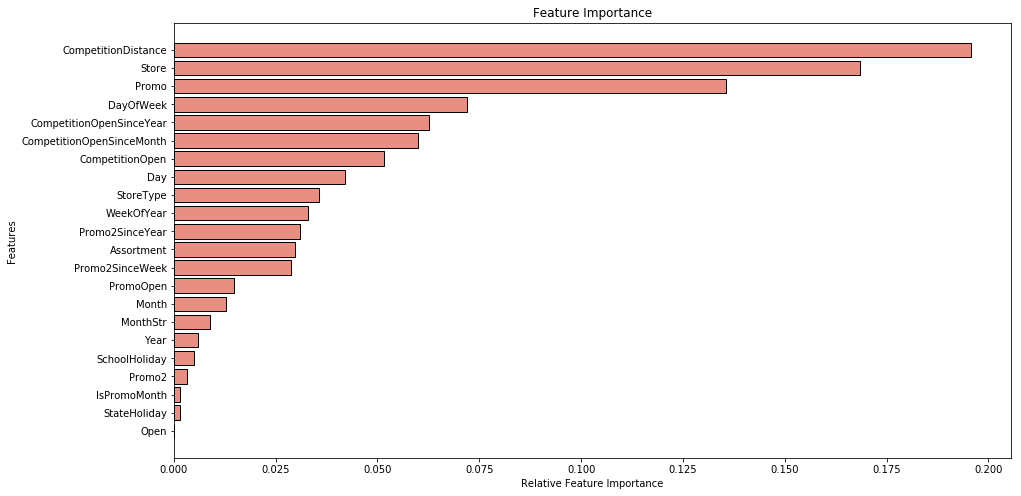

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sn.barplot(x=0, y=1, color="salmon", data=feature_importance, edgecolor="black")
plt.xlabel("Relative Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.plot()

In [46]:
#Function to use on our models in order to compare the results 

def Error_Rate(y_true, y_pred):
    data = []
    for i in range(len(y_true)):
        data.append(abs(y_true[i] - y_pred[i]))

    return np.asarray(data)

In [47]:
len(X_test[0])

22

In [48]:
len(X_test)

168868

In [49]:
X_test[168867] [4]

0.0

In [50]:
len(X_train[0])

22

In [51]:
# Calculate the Prediction
y_pred = rf_reg.predict(X_test)

In [52]:
# Calculate the statistics on the error rate
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

In [53]:
mse,r2,mae

(154234.19354489894, 0.984092921448748, 148.0)

In [54]:
from math import sqrt
rmse = sqrt(mse)
rmse

392.72661425589547

In [55]:
# Calculate the mean absolute error for all `y_v`
pred_dist = Error_Rate(y_test, y_pred)

In [56]:
pred_dist.max(), pred_dist.min()

(10788.5, 0.0)

In [57]:
# Get the statistics on `pred_dist`
mean = np.mean(pred_dist)
variance = np.var(pred_dist)
sigma = np.sqrt(variance)

Text(0.5,1,'Distribution of the Absolute Error')

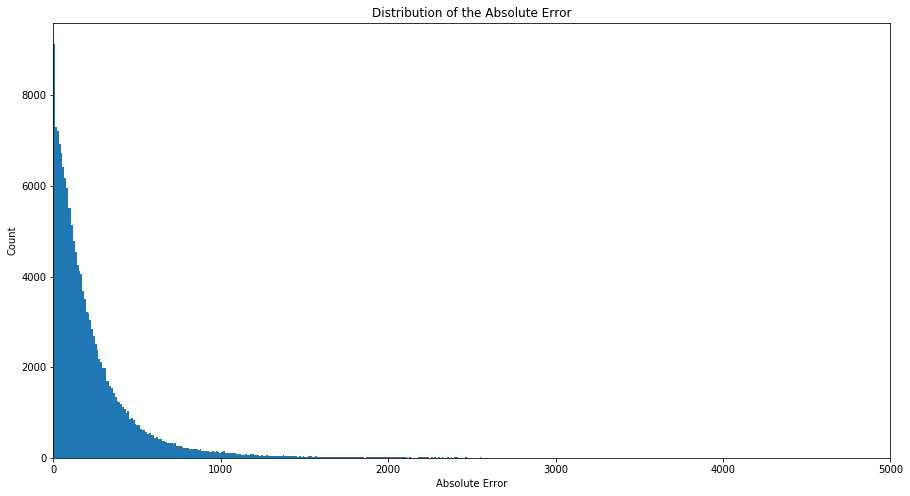

In [58]:
# Plot the distribution of the mean absolute error
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plt.hist(pred_dist, bins=1000)
plt.xlim([0,5000])
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Distribution of the Absolute Error")

### K-Nearest Neighbors Regression

In [59]:
# Predict the values and get the Absolute Error
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=113, n_jobs=-1)
knn_reg.fit(X, y)
y_pred = knn_reg.predict(X_test)
pred_dist = Error_Rate(y_test, y_pred)

Text(0.5,1,'KNN Distribution of the Absolute Error')

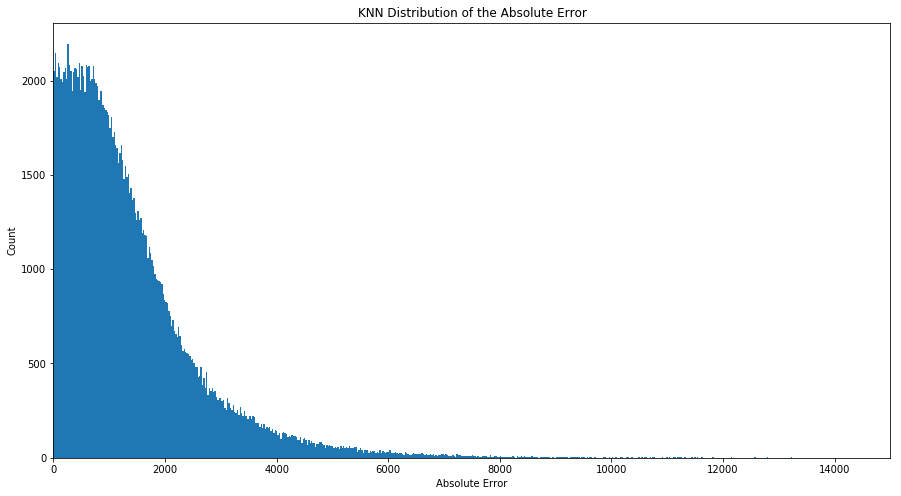

In [60]:
# Plot the distribution
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plt.hist(pred_dist, bins=1000)
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.xlim([0,15000])
plt.title("KNN Distribution of the Absolute Error")

In [61]:
# Get the statistical values
mean = np.mean(pred_dist)
variance = np.var(pred_dist)
sigma = np.sqrt(variance)

In [62]:
mean, variance, sigma

(1379.8349859480759, 1596065.3367298383, 1263.3547944777185)

In [63]:
mse,r2,mae,rmse

(154234.19354489894, 0.984092921448748, 148.0, 392.72661425589547)

### Lasso is a nice regularization technique

C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5,1,'Lasso Coefficients')

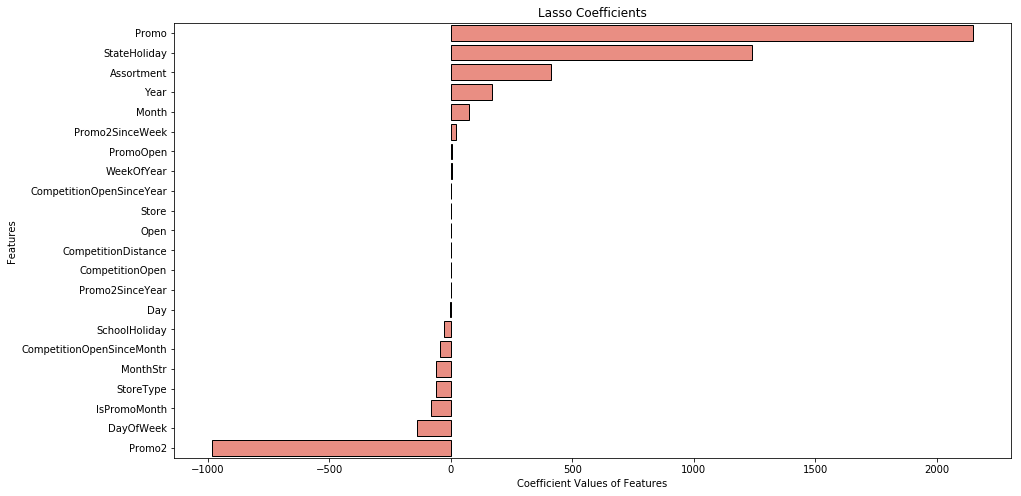

In [64]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.001, fit_intercept=True, normalize=True, precompute=True)
lasso.fit(X, y)

# Create Data Frame of the "important features"
lasso_feature_importance = pd.DataFrame(list(reversed(sorted(zip(lasso.coef_, features_list)))))

# Plot a barchart of the feature values
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sn.barplot(x=0, y=1, color="salmon", data=lasso_feature_importance, edgecolor="black")
plt.xlabel("Coefficient Values of Features")
plt.ylabel("Features")
plt.title("Lasso Coefficients")

In [65]:
# Predict the values and get the Absolute Error

y_pred = lasso.predict(X_test)
pred_dist = Error_Rate(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

mse,r2,mae

(7817271.669327837, 0.19375884398633736, 1612.4980722552864)

# SVM model on the dataset to make the predictions

In [ ]:
from sklearn import svm

#create an instance 'svc' by setting the parameters
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train, y_train)

C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
